In [4]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def make_var_df(input_csv):
    tpm_df = pd.read_csv(input_csv, index_col=0)
    coef_var = np.log10((tpm_df.std(axis=1)/tpm_df.mean(axis=1))**2)
    means = np.log10(tpm_df.mean(axis=1))
    result = stats.linregress(means, coef_var)
    slope = result[0]
    y_int = result[1]
    var_df = pd.DataFrame([coef_var, means]).T
    var_df.rename(columns = {0:'coef_var',1:'mean'}, inplace=True)
    var_df['expected'] = var_df['mean']*slope + y_int
    
    return var_df

In [6]:
tpm_input_file = "/oasis/tscc/scratch/cshl_2018/atlas1_full_counts/tpm_all.csv"
save_dir = "/home/ucsd-train25/scratch/projects/atlas_full/processed_files/"

In [14]:
tpm = pd.read_csv(tpm_input_file, index_col=0)
print(tpm.shape)
tpm.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,3.273858,3.373819,2.495633,2.273761,0.0,4.713091,0.0,1.920492,2.990431,0.0,...,3.446691,1.757469,0.0,0.000000,0.0,8.877710,0.0,0.0,10.992031,1.923151
Lypla1,3.273858,0.000000,0.000000,1.136880,0.0,0.000000,0.0,0.000000,0.747608,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.739809,0.0,0.0,0.000000,0.384630
Gm37988,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.878735,0.0,2.082899,0.0,1.479618,0.0,0.0,0.000000,0.384630


In [83]:
(tpm.mean(axis=1) == 0).sum()

0

In [29]:
sd = tpm.std(axis=1)
sd.head()

Mrpl15     3.334953
Lypla1     2.101972
Gm37988    0.040944
Tcea1      0.682425
Atp6v1h    1.120129
dtype: float64

In [30]:
mean_expr = tpm.mean(axis=1)
mean_expr.head()

Mrpl15     2.626871
Lypla1     1.065084
Gm37988    0.000782
Tcea1      0.201816
Atp6v1h    0.320952
dtype: float64

In [35]:
coef_var = np.log10((sd/mean_expr)**2)
coef_var.head()

Mrpl15     0.207302
Lypla1     0.590486
Gm37988    3.437682
Tcea1      1.058197
Atp6v1h    1.085655
dtype: float64

In [36]:
means = np.log10(mean_expr)
means.head()

Mrpl15     0.419439
Lypla1     0.027384
Gm37988   -3.106656
Tcea1     -0.695044
Atp6v1h   -0.493559
dtype: float64

In [76]:
reg_result = stats.linregress(means, coef_var)


LinregressResult(slope=-0.9006364144049142, intercept=0.7199867215099409, rvalue=-0.9824119932949177, pvalue=0.0, stderr=0.0013546348854553574)

In [41]:
reg_result = stats.linregress(means, coef_var)
reg_result

LinregressResult(slope=-0.9006364144049142, intercept=0.7199867215099409, rvalue=-0.9824119932949177, pvalue=0.0, stderr=0.0013546348854553574)

In [42]:
slope = reg_result[0]
yint = reg_result[1]

In [87]:
var_df = pd.DataFrame([coef_var, means]).T
var_df.head()

,0,1
Mrpl15,0.207302,0.419439
Lypla1,0.590486,0.027384
Gm37988,3.437682,-3.106656
Tcea1,1.058197,-0.695044
Atp6v1h,1.085655,-0.493559


In [89]:
var_df.rename(columns = {0:"coef_var", 1:"mean"}, inplace=True)
var_df.head()

,coef_var,mean
Mrpl15,0.207302,0.419439
Lypla1,0.590486,0.027384
Gm37988,3.437682,-3.106656
Tcea1,1.058197,-0.695044
Atp6v1h,1.085655,-0.493559


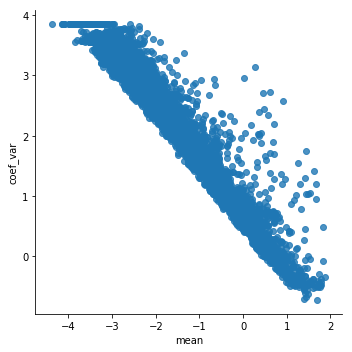

In [91]:
sns.lmplot('mean', 'coef_var', data=var_df, fit_reg=False)

In [92]:
var_df['expected'] = var_df['mean']*slope + yint
var_df.head()

,coef_var,mean,expected
Mrpl15,0.207302,0.419439,0.342225
Lypla1,0.590486,0.027384,0.695324
Gm37988,3.437682,-3.106656,3.517954
Tcea1,1.058197,-0.695044,1.345968
Atp6v1h,1.085655,-0.493559,1.164504


In [95]:
#(var_df['coef_var'] - var_df['expected']) > 0.1

In [111]:
var_df['sig'] = (var_df['coef_var'] - var_df['expected']) > 0.05
var_df.head()

,coef_var,mean,expected,sig
Mrpl15,0.207302,0.419439,0.342225,False
Lypla1,0.590486,0.027384,0.695324,False
Gm37988,3.437682,-3.106656,3.517954,False
Tcea1,1.058197,-0.695044,1.345968,False
Atp6v1h,1.085655,-0.493559,1.164504,False


In [17]:
var_df = make_var_df(tpm_input_file)
var_df['sig'] = (var_df['coef_var'] - var_df['expected']) > 0.1
var_df.head()

,coef_var,mean,expected,sig
Mrpl15,0.207302,0.419439,0.342225,False
Lypla1,0.590486,0.027384,0.695324,False
Gm37988,3.437682,-3.106656,3.517954,False
Tcea1,1.058197,-0.695044,1.345968,False
Atp6v1h,1.085655,-0.493559,1.164504,False


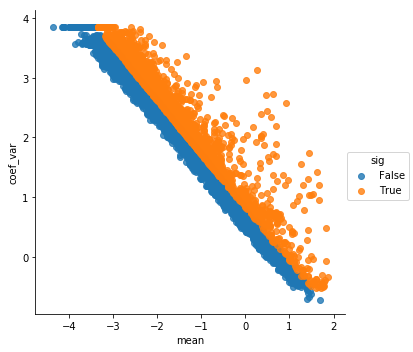

In [18]:
sns.lmplot('mean', 'coef_var', var_df, hue='sig', fit_reg=False)

In [19]:
var_df['sig'].sum()

2707

In [20]:
tpm.head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,3.273858,3.373819,2.495633,2.273761,0.0,4.713091,0.0,1.920492,2.990431,0.0,...,3.446691,1.757469,0.0,0.000000,0.0,8.877710,0.0,0.0,10.992031,1.923151
Lypla1,3.273858,0.000000,0.000000,1.136880,0.0,0.000000,0.0,0.000000,0.747608,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.739809,0.0,0.0,0.000000,0.384630
Gm37988,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.878735,0.0,2.082899,0.0,1.479618,0.0,0.0,0.000000,0.384630


In [21]:
tpm_var_genes = tpm.loc[var_df['sig']]
print(tpm_var_genes.shape)
tpm_var_genes.head()

(2707, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Cspp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.153891
Prdm14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Trpa1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Sbspon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [22]:
tpm_var_genes.to_csv(save_dir+"tpm_all_vg_0.1.csv")

In [131]:
save_dir

'/home/ucsd-train25/scratch/projects/atlas_full/processed_files/'